## Import modules

In [95]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading the dataset

In [96]:
df=pd.read_csv('bank-loan.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [97]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


## Preprocessing the dataset

In [99]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [100]:
# Droping missing value rows
df=df.dropna()
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [101]:
print(df.shape)

(700, 9)


## Exploratory Data Analysis

In [104]:
df.groupby('default').mean()

,age,ed,employ,address,income,debtinc,creddebt,othdebt
default,,,,,,,,
0.0,35.514507,1.659574,9.508704,8.945841,47.154739,8.679304,1.245493,2.773409
1.0,33.010929,1.901639,5.224044,6.393443,41.213115,14.727869,2.423865,3.862807


0.0    517
1.0    183
Name: default, dtype: int64


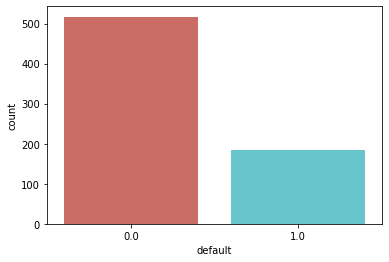

In [105]:
print(df['default'].value_counts())
sns.countplot(x='default',data=df, palette='hls')
plt.show()

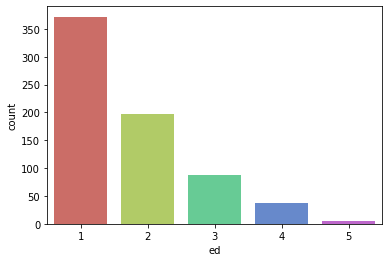

In [106]:
sns.countplot(x='ed',data=df, palette='hls')
plt.show()

In [17]:
data_cat =pd.get_dummies(df, columns=['ed'], drop_first=True)

In [18]:
data_cat.head()

,age,employ,address,income,debtinc,creddebt,othdebt,default,ed_2,ed_3,ed_4,ed_5
0,41,17,12,176,9.3,11.359392,5.008608,1.0,0,1,0,0
1,27,10,6,31,17.3,1.362202,4.000798,0.0,0,0,0,0
2,40,15,14,55,5.5,0.856075,2.168925,0.0,0,0,0,0
3,41,15,14,120,2.9,2.658720,0.821280,0.0,0,0,0,0
4,24,2,0,28,17.3,1.787436,3.056564,1.0,1,0,0,0


In [25]:
X=data_cat[['age','employ','address','income','debtinc','creddebt','othdebt','ed_2', 'ed_3', 'ed_4', 'ed_5']]
y=data_cat.default

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [52]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.25,random_state=42)

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100,120,150,200],
            'max_depth': [4, 7, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(random_state=34),
        'params': {
            'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
            'C': [1,5,10]
        }
    }
}

In [53]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
grid

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to conv

,model,best_score,best_params
0,svm,0.799121,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.791612,"{'max_depth': 7, 'min_samples_leaf': 5, 'min_s..."
2,logistic_regression,0.799158,"{'C': 10, 'solver': 'lbfgs'}"


In [37]:
from sklearn.metrics import accuracy_score
pred = clf.predict(x_test)
accuracy_score(y_test,pred)

0.8514285714285714

[[130   7]
 [ 19  19]]


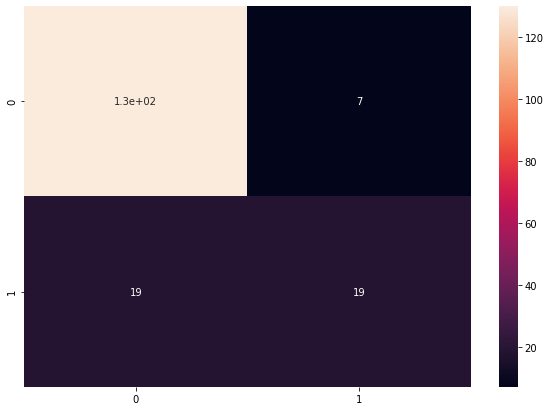

In [38]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel=("Predict")
plt.ylabel=("Truth")
print(cm)

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 74.85714285714286
Cross validation is 71.77800616649537


In [30]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 84.57142857142857
Cross validation is 78.80369989722507


In [31]:
model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy is 82.85714285714286
Cross validation is 77.23021582733813


In [32]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 82.28571428571428
Cross validation is 77.36690647482014


In [155]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,age,16.650978
1,ed,4.981880
2,employ,5.703036
3,address,3.531411
4,income,10.477181
5,debtinc,8.639826
6,creddebt,3.718221
7,othdebt,6.450959


In [156]:
df1 = df.drop(['age'],axis=1)
Y = df1.iloc[:,:-1]
calc_vif(Y)

,variables,VIF
0,ed,4.028607
1,employ,4.365313
2,address,2.747323
3,income,9.347920
4,debtinc,5.476308
5,creddebt,3.371761
6,othdebt,5.585873


In [169]:
x=df1[['ed','employ','address','income','debtinc','creddebt','othdebt']]
y=df1.default

In [158]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import numpy as np


C:\Users\Avinash\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='Density'>

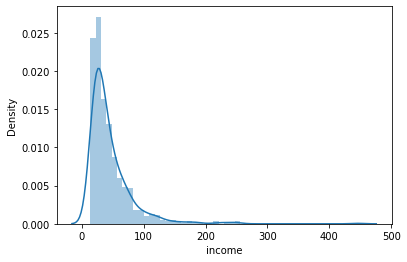

In [170]:
sns.distplot(df1["income"])

In [165]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=10)

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100,120,150,200],
            'max_depth': [4, 7, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C': [1,5,10]
        }
    }
}

In [166]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
grid = pd.DataFrame(scores,columns=['model','best_score','best_params'])
grid

C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\Avinash\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached 

,model,best_score,best_params
0,svm,0.807937,"{'C': 20, 'kernel': 'linear'}"
1,random_forest,0.820635,"{'max_depth': 7, 'min_samples_leaf': 5, 'min_s..."
2,logistic_regression,0.809524,"{'C': 1, 'solver': 'liblinear'}"


In [161]:
grid.best_params

0                        {'C': 10, 'kernel': 'linear'}
1    {'max_depth': 20, 'min_samples_leaf': 2, 'min_...
2                      {'C': 1, 'solver': 'liblinear'}
Name: best_params, dtype: object

In [167]:
pred = clf.predict(x_test)
accuracy_score(y_test,pred)

0.8428571428571429

[[50  3]
 [ 8  9]]


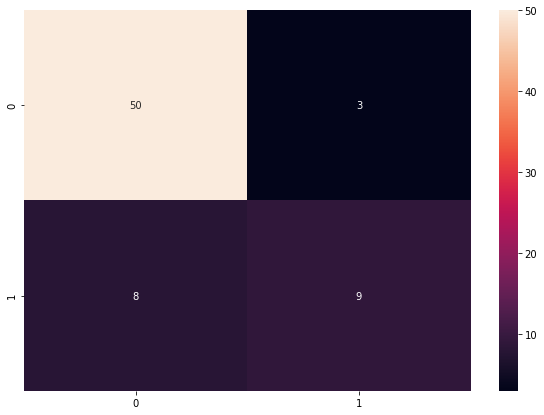

In [168]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel=("Predict")
plt.ylabel=("Truth")
print(cm)

In [21]:
score=cross_val_score(RandomForestClassifier(max_depth': 20, 'min_samples_leaf': 2 = 10),x,y)
score

0.8

In [267]:
score=cross_val_score(DecisionTreeClassifier(random_state = 10),x,y)
np.average(score)

0.7100000000000001

In [268]:
score=cross_val_score(SVC(gamma='auto'),x,y)
np.average(score)

0.7614285714285713

In [269]:
score=cross_val_score(LogisticRegression(),x,y)
np.average(score)

0.8142857142857143

In [130]:
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)
#model=RandomForestClassifier(max_depth=4, random_state = 10)
model=LogisticRegression(C=1)
model.fit(x_train, y_train)
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
accuracy_score(y_test,pred)

0.8214285714285714

[[102   8]
 [ 17  13]]


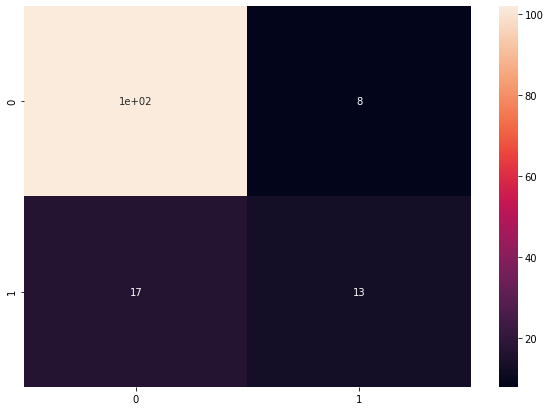

In [131]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel=("Predict")
plt.ylabel=("Truth")
print(cm)

In [286]:
TN = cm[0][0]
FP = cm[1][0]
FN = cm[0][1]
TP = cm[1][1]

In [287]:
Accuracy= (TP+TN) / (TP+FN+FP+TN) 
False_Positive_rate= FP / (FP+TP)
False_Negative_rate= FN / (FN+TP)

In [288]:
print(Accuracy)
print(False_Positive_rate)
print(False_Negative_rate)

0.8142857142857143
0.5555555555555556
0.2727272727272727


In [289]:
print(FP)

30


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       0.84      0.98      0.91        49
         1.0       0.92      0.57      0.71        21

    accuracy                           0.86        70
   macro avg       0.88      0.78      0.81        70
weighted avg       0.87      0.86      0.85        70



In [249]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds= precision_recall_curve(y_test,pred)

In [222]:
precision

array([0.24285714, 0.6       , 1.        ])

In [223]:
recall

array([1.        , 0.44117647, 0.        ])

In [224]:
thresholds

array([0., 1.])

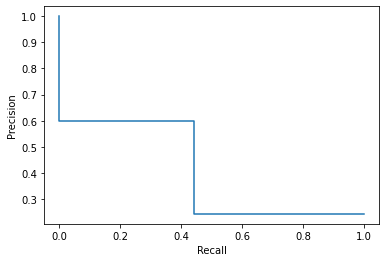

In [250]:
from sklearn.metrics import PrecisionRecallDisplay
pr_display = PrecisionRecallDisplay(precision, recall).plot()

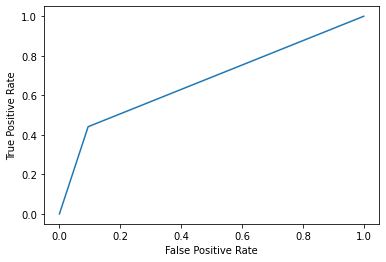

In [251]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
fpr, tpr, _ = roc_curve(y_test,pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

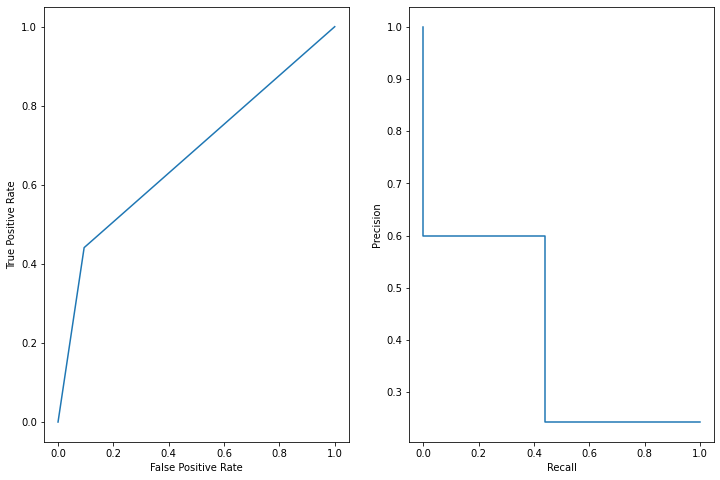

In [252]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()